In [1]:
import pandas as pd
df = pd.read_csv("dataFile.csv")
df.head

<bound method NDFrame.head of           Id                                              Tweet  following  \
0       3697  #jan Idiot Chelsea Handler Diagnoses Trump Wit...     3319.0   
1      10740  Pedophile Anthony Weiner is TERRIFIED of Getti...     4840.0   
2       9572  EBMUD ending penalties for excessive water use...     4435.0   
3      10963  Paraguayan man linked to Hezbollah faces drug ...     9025.0   
4       5401  #NowPlaying: De La Soul feat. Roc Marciano "Pr...      780.0   
...      ...                                                ...        ...   
11963   2981  Hi @zaynmalik I love #MindOfMine\r\n\r\nCould ...        0.0   
11964  11954  Welcome To Baton Rouge !pic.twitter.com/Y831V5...        0.0   
11965   7866                                   11:11 meet harry        0.0   
11966   7841  If BBC Food disappears the loss of knowledge w...        0.0   
11967   6818  I uploaded a new track, "Everyday Lite 1", on ...        0.0   

       followers   Reputation  ac

In [1]:
from IPython.display import HTML
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd 
from collections import Counter
import nltk
nltk.download('punkt')

ps = PorterStemmer()

df = pd.read_csv("dataFile.csv", encoding= 'unicode_escape')
df.fillna(0)
pd.options.display.max_rows = 4000
df['Type'] = df['Type'].str.replace('Spam','1')
df['Type'] = df['Type'].str.replace('Quality','0')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
frequent_spamwords = ['trump', 'news', 'polic', 'break', 'man', 'obama', 'polit', 'world', 'kill',
'sport','sport','state', 'amp', 'hillari','fire', 'local','against',
'white', 'support', 'report', 'u.s.','shoot','attack','hous','american',
'woman','offic','america','media','arrest','cop','liber','home','democrat',
'down','crash','elect','shot','gop','dead','court','suspect','investig',
'crime','busi','death','maga','fight','gun','north','south','million',
'tcot','women','realdonaldtrump','nation','doe','bill','counti']
frequent_qualitywords = ['love', 'thank','happi', 'good','got','some','think','feel','come',
'pleas','pleas','u','birthday','na','realli','life','been', 'even','ca',
'girl','great','last','much',"'ll","'ve",'never','best','lol','still',
'alway','way','give','post','too','check','start','am','someon','im',
'2016','where','job','off','week','miss','shit','lot','talk','follow',
'free','guy','ani','>','music','stop','fuck','becaus','leav','person',
'photo']


In [3]:
Tweets = df["Tweet"]
words = []
wordrateCol = []
hashtagsCol = []
linksCol = []
i = 0
for tweet in Tweets:
    wordrate = 0
    hashtags = 0
    links = 0
    for word in word_tokenize(tweet):
        stemmed_word = ps.stem(word)
        if stemmed_word in frequent_spamwords:
            wordrate = wordrate + 1
        elif stemmed_word in frequent_qualitywords:
            wordrate = wordrate - 1
        if stemmed_word == '#':
            hashtags = hashtags + 1
        if stemmed_word == 'http':
            links = links + 1
    
    wordrateCol.append(wordrate)
    hashtagsCol.append(hashtags)
    linksCol.append(links)
    i = i + 1
    
print(type(wordrateCol[9]))
df['wordrate'] = wordrateCol
df['hashtags'] = hashtagsCol
df['links'] = linksCol

dfnew = df.drop('Type',axis='columns')
dfnew = df.drop('Tweet',axis='columns')
dfnew['Type'] = df["Type"]
df = dfnew

<class 'int'>


In [5]:
df['Type'] = df['Type'].fillna(0)
df['following'] = df['following'].fillna(0)
df['actions'] = df['actions'].fillna(0)
df['is_retweet'] = df['is_retweet'].fillna(0)
df['followers'] = df['followers'].fillna(0)
df['Reputation'] = df['Reputation'].str.replace('#DIV/0!','0')
df[:25]

,Id,following,followers,Reputation,actions,is_retweet,Type,wordrate,hashtags,links
0,3697,3319.0,611.0,0.155470738,294.0,0.0,1,1,1,2
1,10740,4840.0,1724.0,0.262644729,1522.0,0.0,1,0,0,1
2,9572,4435.0,16041.0,0.783404962,27750.0,0.0,1,0,0,1
3,10963,9025.0,20165.0,0.690818774,6331.0,0.0,1,1,0,2
4,5401,780.0,897.0,0.534883721,4792.0,1.0,1,-1,2,2
5,7636,1893.0,1651.0,0.465857788,3564.0,1.0,1,3,3,2
6,6908,7981.0,12815.0,0.616224274,13601.0,1.0,1,0,0,1
7,10433,85.0,73.0,0.462025317,434.0,0.0,1,0,3,0
8,4941,856.0,1093.0,0.560800411,6219.0,1.0,1,0,0,2
9,7237,456.0,821.0,0.642913078,5797.0,1.0,1,0,1,0


In [6]:
target = df.Type
inputs = df.drop('Type',axis='columns')
target
X = inputs
y = target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.2)

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [10]:
model.fit(X_train,y_train)

GaussianNB()

In [11]:
model.score(X_test,y_test)

0.5810359231411864

In [15]:
y_predicted = model.predict(X_test)
HTML(X_test.to_html())
print(X_test[:10])
print(y_test[:10])
print(y_predicted[:10])


          Id  following  followers   Reputation  actions  is_retweet  \
3628     657      611.0      742.0  0.548410939   1790.0         1.0   
4192   11446     5279.0    17486.0  0.768108939  23389.0         0.0   
10058  12214        0.0        0.0            0      0.0         0.0   
28     11071     4745.0     2287.0  0.325227531    722.0         0.0   
5542    7934     7321.0    12324.0    0.6273352   4663.0         0.0   
5828    5200        0.0        0.0            0      0.0         0.0   
3003   10927     8167.0    19510.0  0.704917441  13223.0         0.0   
6746    2404        0.0        0.0            0      0.0         0.0   
7969    2951        0.0        0.0            0      7.0         0.0   
6842    2389        0.0        0.0            0      0.0         0.0   

       wordrate  hashtags  links  
3628         -1         0      0  
4192          1         2      1  
10058         0         0      0  
28            1         0      1  
5542          0         1      2

In [16]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[ 229, 1002],
       [   1, 1162]], dtype=int64)

Text(69.0, 0.5, 'Truth')

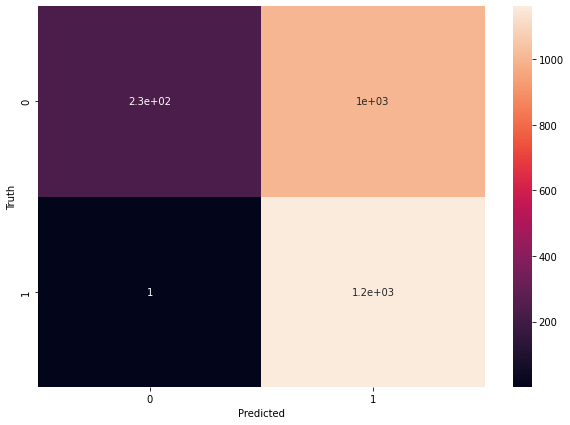

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
y_test[:15]


3628     1
4192     1
10058    0
28       1
5542     1
5828     0
3003     1
6746     0
7969     0
6842     0
10644    0
240      1
11370    0
11174    0
1373     1
Name: Type, dtype: object

In [20]:
y_predicted[:15]

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1'], dtype='<U1')